# DAV 6150 Module 4 Assignment 


Zhihong Zhang

## Introduction## 
The module is aiming to develop feature selection or  dimensionality reduction technique to reduce the number of explanatory variables required for the intended model and make an analysis of a automobile data set.  

The general method I plan to do is to do a exploratory data analysis to check data set and fixed possible invalid or null values. Also based on the EDA, construct feature selection and Based on the this result, then decided to build linear regression model to test accuracy.

## Data to be Used ##
The initial data set that was used for this research comes from the  UCI repository  https://archive.ics.uci.edu/ml/datasets/Automobile . The data set is a csv format file which can be easily loaded into Python by utilizing the pandas package.  The data set covers 205 observations and 26 attributes and it is used to generate the observable pattern and visualizations. 


## Part 1 Data Acquisition: ##

In [8]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression
#one method to fill missing value
from sklearn.impute import SimpleImputer


#reads data from the original source, since first row is column name,also add header. 
auto = pd.read_csv("https://raw.githubusercontent.com/steinszzh/DAV6150/master/m4hw/M4_Data.csv", header= None)

# data set check - make sure data was read in as expected
auto.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


The first thing to do is to check the null value and if there exist null value, replace or drop missing data. 

In [9]:
# summarize the number of rows with missing values for each column / simple check is using auto.isnull().sum()
for i in range(auto.shape[1]):
	# count number of rows with missing values
	n_miss = auto[[i]].isnull().sum()
	perc = n_miss / auto.shape[0] * 100
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 0 (0.0%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)


By running code, there is no null value. And we need to check with UCI repo attributes. 

### Data preparation: ###

Based on attributes information from UCI, 26 attributes are showed as follows: 

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

In [13]:
# how many observations are contained within the example data set?
len(auto)

205

based on these results, there is no null values, but we can easily see there is ? value in the data set, however it is still invalid. We will deal with these invalid data later after renaming the column




In [3]:
# check data type
auto.dtypes

0       int64
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9     float64
10    float64
11    float64
12    float64
13      int64
14     object
15     object
16      int64
17     object
18     object
19     object
20    float64
21     object
22     object
23      int64
24      int64
25     object
dtype: object

Also, by checking data type, we also want to make sure these numeric items are showed properly. We need to conver item such as normalized-losses,num-of-doors etc from string to numeric values.

### Renaming the column based on UCI repostitory 

Since column has only numbers , and we then need to rename the column to give a meaningful title based on UCI repository. 

In [22]:
# rename the column based on UCI repo
auto.columns = ['symboling', 'normalized_losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

auto.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


By checking this data set, two obvious problems need to be fixed. 
-   some string is possible to be converted into number such as (num of door, cylinders) 

- ? values in the data set. ( it should be transformed into some meaningful values.)

I start with change ? value. Since it will be easier to treat as null value, I firstly convert all ? into null values.

In [23]:
auto = auto.replace('?', np.NaN)
# check number of nulls to detect number of invalid values.
auto.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Now we know that previous invalid data ? only appears in 7 attributes. And they are in the normalized-losses ,num-of-doors  ,bore,stroke,horsepower,peak-rpm , and price. Among these data, only normalized-losses has about 20% invalid data, other attributes has only up to 2% data missing. 

After getting raw data preparation,we can then launch EDA.

## Part 2 Exporatory data analysis (EDA): ##

Firstly I start with general statistics of data set. 

In [24]:
#start with overview of data set
auto.describe()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,203.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.123153,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,0.994841,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


We can tell that only 10 attributes can be used for numerical graphing. Then we need to fill in missing value and get another data. Based on this Statistics data, Both median and mean seems work for this missing data filling. Since attributes except  normalized-losses only have small missing (less than 2%) median or average filling should not make a huge difference. But for the  normalized-losses, mean may be better to use according to Central Limit theory. Therefore I decided to fill all data with mean value. Also, in our scenario, we have some nominal data such as num of doors, cylinders, mode is also one of the option(although it is not commonly used)

Since there is missing value in num-of-doors, price and their data type is object, I need to convert from string firstly before I fill in missing data(otherwise function does not work.)

In [25]:
#make number of door from string to numeric 
auto['num-of-doors'].replace('two', 2, inplace=True)
auto['num-of-doors'].replace('four', 4, inplace=True)

#check value after
auto['num-of-doors'].unique()

array([ 2.,  4., nan])

In [0]:
#conver normalized-losses into float

auto["normalized_losses"] =auto.normalized_losses.astype(float)
#price
auto["price"] =auto.price.astype(float)

In [0]:
#filling missing value with mean
auto["normalized_losses"].fillna(auto['normalized_losses'].mean(), inplace=True)

#others using median
# num of door can also use mode
auto['num-of-doors'].fillna(auto['num-of-doors'].median(), inplace=True)

auto['bore'].fillna(auto['bore'].median(), inplace=True)
auto['stroke'].fillna(auto['stroke'].median(), inplace=True)
auto['horsepower'].fillna(auto['horsepower'].median(), inplace=True)
auto['peak-rpm'].fillna(auto['peak-rpm'].median(), inplace=True)
#replace price
auto['price'].fillna(auto['price'].median(), inplace=True)

After filling, we still need to check whether we have missing value or not

In [31]:
auto.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Note: Although here I used median or mean to fill the missing value, it is still a bit risky to fill normalized_losses attribute for its relatively large percentage of missing data(20%). sklearn's simple imputer can also provide other way to fill this missing data. Due to the limited group member and time of this project, I only use this median, mean method this time. 

In [45]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

And notice even after filling value, some data such as bore, horsepower ,still does not change data type, then I need to convert again


In [0]:
# convert data
#bore
auto["bore"] =auto.bore.astype(float)
#bore
auto["stroke"] =auto.stroke.astype(float)

#horsepower

auto["horsepower"] =auto.horsepower.astype(float)

After we filled the missing value, we can get a nice overview of all numeric attributes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa405255588>,
      dtype=object)

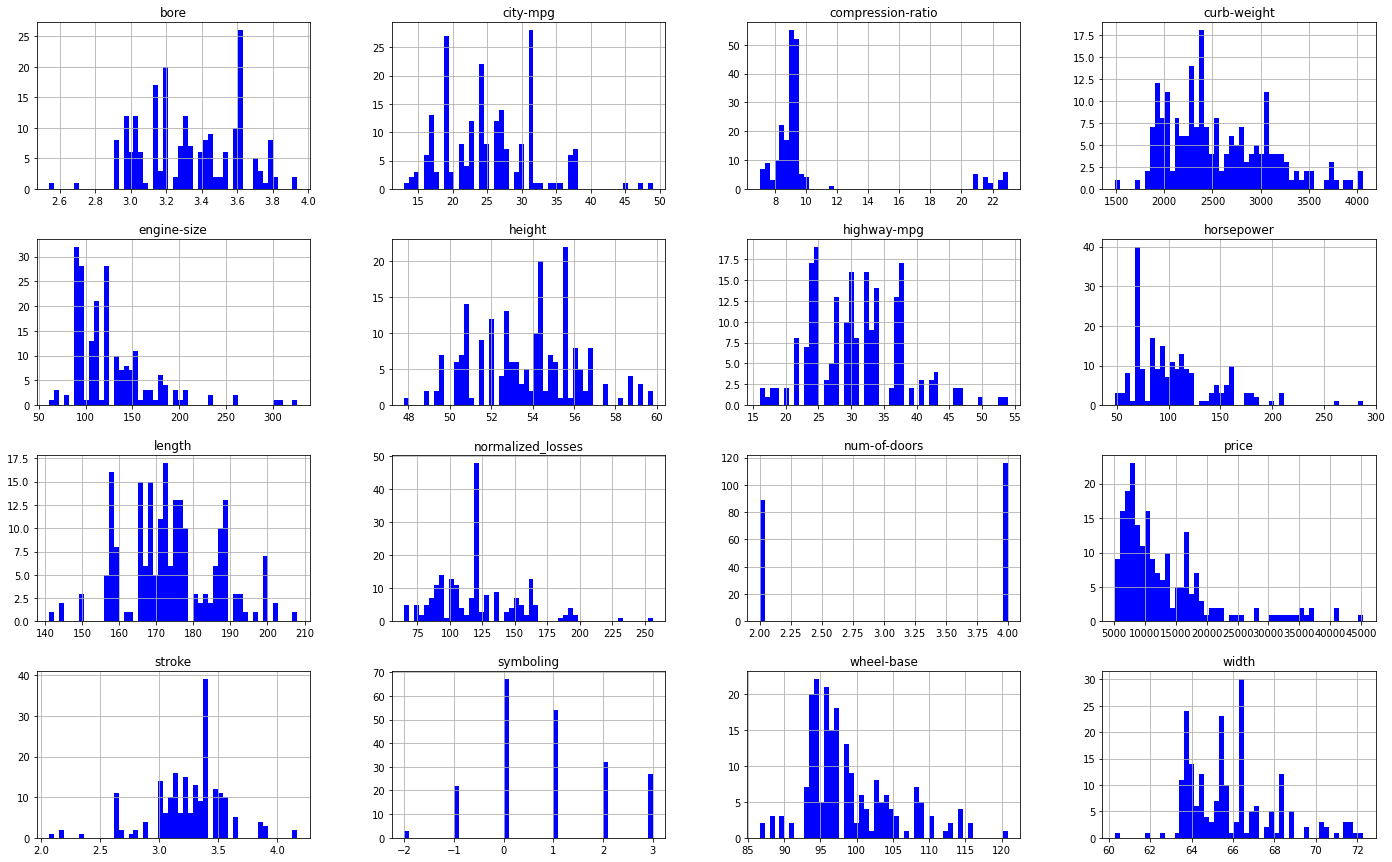

In [54]:
#run to have overview of all histogram
auto.hist(bins=50, color='b', figsize=(24,15))

Now we can have a broad picture of these attributes, and most of them are either normal or a bit skewed except num of doors attribute(since it is almost a binary case)

Among these attributes, we can check our response variablle city-mpg first

Text(0.5, 1.0, 'Electricity Energy Output  Boxplot ')

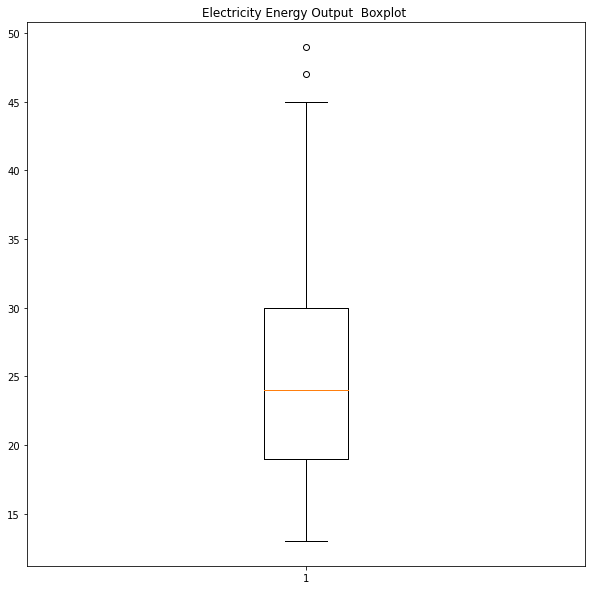

In [55]:

# make boxplot  
# define some attributes

auto_cm = auto['city-mpg']

# define a new figure for plotting
plt.figure(figsize=(10,10))

# define the plot that will appear on the lefthand side of the subplot:

# Matplotlib boxplot  
plt.boxplot(x=auto_cm)

# give the plot a title
plt.title('Electricity Energy Output  Boxplot ')



 Correlation Matrix plots or heat maps is used to see their coorelation values among variables. But in this data set, these four scatterplot is clear enough for showing correlations. I decided not to use other methods. And I want to focus on both clear indicators (Temperature and Exhaust Vacuum.)

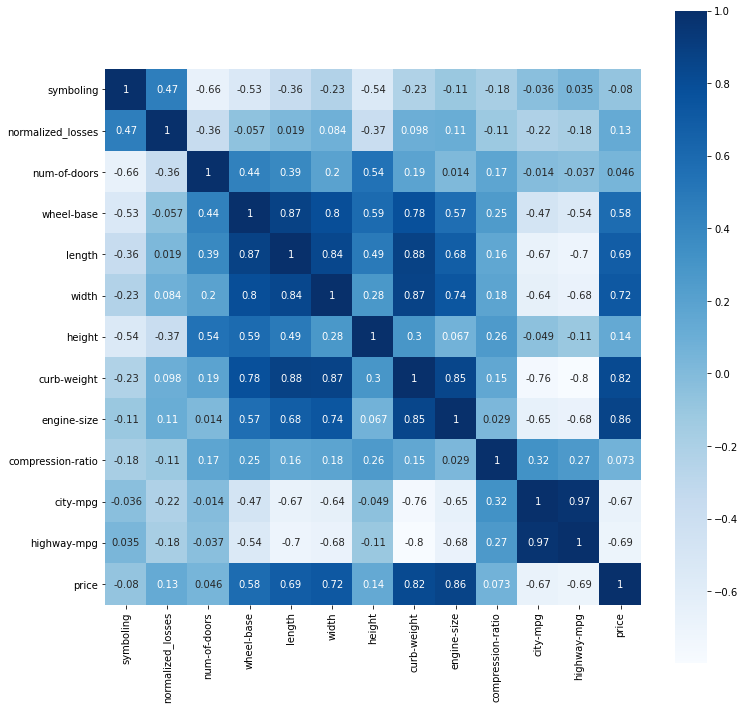

In [39]:
#heat map
cor= auto.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(cor, annot=True, vmax=1, square=True, cmap="Blues")

Based on this heat map, there are some insights:
- num of doors has some relatively strong negative coorelation with symboling
- wheel base has stronger coorelation among length,width and curb weight.
-engine size has stronger coorelation among length,width and curb weight as well.
- city mpg has stronger negative coorelation with length,width, curb weight ,engine size and price. But it has strongest positive coorelation with highway mpg.
-high way mpg shared similar situation. 


Interestingly, some coorelation are related to car dimension. Even engine size coorelated to the length, And it actually make sense that since a bigger vehicle requires more power to boost and it may be more expansive( SUV vs small car)  . I can see city mpg shows a collinearity with highway mpg. These two attributes are almost identical 

###apply Scatterplot  ###

My domain knowlege told me some realtionship such as horsepower,engine size can be used to predict mpg. I can use scatterplot to check it. 

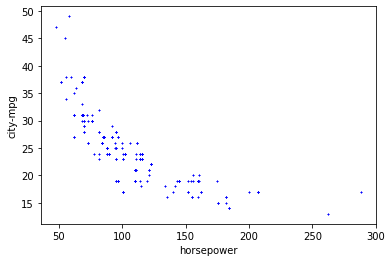

In [47]:
#print scatterplot for 'horsepower' vs 'city-mpg'
scatter_plot = auto.plot.scatter('horsepower','city-mpg',color = 'b', s=1, marker = "x")

It is a very strong coorelation.

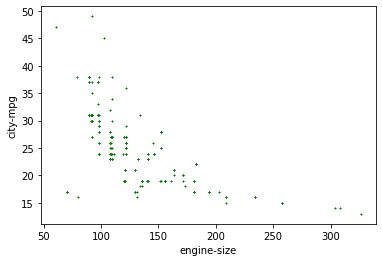

In [50]:
#print scatterplot for 'engine-size' vs 'city-mpg'
scatter_plot = auto.plot.scatter('engine-size','city-mpg',color = 'g', s=1, marker = "x")

It is also a clear negative coorelation

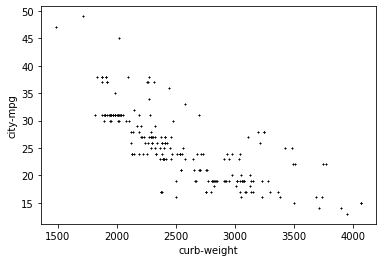

In [56]:
#print scatterplot for ''curb-weight' vs 'city-mpg'
scatter_plot = auto.plot.scatter('curb-weight','city-mpg',color = 'k', s=1, marker = "x")

These three attributes are very similar , and I would like to use as the explantary variable.

## Part 3 Feature Selection / Dimensionality Reduction  : ##
Based on this exploratory data analysis, then I would like to exclude some of the attributes.
highway mpg is the attribute I want to exclude, it is definitely collinear with city mpg and it is almost identical to our desired response variable.

Based on EDA and my domain knowlege, horsepower is a very good indicator for the response variable, along with 'engine-size'


So I will use forward selection and start with horsepower and engine-size 

## Part 4  Regression Model Evaluation : ##
I built the model for testing.
Firstly I would like to see how normal indicator perform like, and then I built model based on  


In [0]:
# set up some library and basic model
# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split


#set explanatory variable to X  
X = auto[['Temperature','Ambient_Pressure','Relative_Humidity','Exhaust_Vacuum']]
# give  variable to y
y = plant['Energy_output']
# Now split the data into training and testing subsets. 
# We'll set aside 20% of the data for testing purposes;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

Then check the setup

In [0]:
# show first five rows of X_train
X_train.head()

,Temperature,Ambient_Pressure,Relative_Humidity,Exhaust_Vacuum
2711,31.11,1002.37,41.56,69.05
5538,9.27,1010.79,79.56,39.64
508,17.35,1014.62,74.16,42.86
3512,22.94,1008.25,73.45,61.50
7585,25.14,1017.91,53.30,60.29


## Model 1: 

In [0]:
# create a new dataframe containing only the 'Ambient_Pressure and Relative_Humidity variables (our explanatory variables for the linear
# regression model)
newX_train = X_train[['Ambient_Pressure','Relative_Humidity']].copy()



In [0]:

# Define a linear regression model
model = LinearRegression()

# fit the model using 5-fold cross validation
scores = cross_val_score(model, newX_train, y_train, cv=5)

# print out the accuracy 
print (scores)

# use np.mean to get the average scores
print("average socre for model1:",np.mean(scores))
print()

[0.38924932 0.40253871 0.34882946 0.38072653 0.38844573]
average socre for model1: 0.3819579488434063



Normally, we can call this 91.6% accuracy good enough. 
Finally, we build a complete model

## Model 3: complete Model 

In [0]:
# Define a linear regression model
model = LinearRegression()
# create new datafram X3 for complete model
X3 = X_train[['Temperature', 'Exhaust_Vacuum','Ambient_Pressure','Relative_Humidity']]
# fit the model using 5-fold cross validation 
scores = cross_val_score(model, X3, y_train, cv=5)

print(scores)
# use np.mean to get the average scores
print("average socre for model3:",np.mean(scores))


[0.92661916 0.93221968 0.93594576 0.92275381 0.92720045]
average socre for model3: 0.9289477726652141


Then we try 10 fold

In [0]:
# 10 fold
scores = cross_val_score(model, X3, y_train, cv=10)
#print accauracy for k fold validation
print(scores)
# use np.mean to get the average scores
print("average socre for model3:",np.mean(scores))


[0.92615809 0.92712542 0.92845487 0.93581368 0.9381034  0.93404428
 0.9223903  0.92310602 0.92662276 0.92767234]
average socre for model3: 0.9289491154310477


Based on that, we can see a bit improvement from model 2 to model 3. The accuracy increased from around 91% to 92.9%

## Part 5 Conclusion: ##

Based on this analysis and the regression model, I can say that 